In [80]:
import time
import numpy as np
import pandas as pd
import inspect

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from __future__ import print_function


# 0).Install magnitude

In [33]:
# install Magnitude 
!(echo "installing magnitude, please wait\n"; curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)

installing magnitude, please wait\n
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    509      0 --:--:-- --:--:-- --:--:--   507


In [3]:
# download the pretrained model, the total size is 3.9G
!wget "http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude"

--2020-11-18 16:02:11--  http://magnitude.plasticity.ai/word2vec/GoogleNews-vectors-negative300.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.216.128.210
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.216.128.210|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4211335168 (3.9G) [application/x-www-form-urlencoded]
Saving to: ‘GoogleNews-vectors-negative300.magnitude’

GoogleNews-vectors- 100%[===================>]   3.92G  23.0MB/s    in 1m 57s  

2020-11-18 16:04:09 (34.2 MB/s) - ‘GoogleNews-vectors-negative300.magnitude’ saved [4211335168/4211335168]



In [25]:
!pwd

/content


In [26]:
!ls

GoogleNews-vectors-negative300.magnitude  sample_data


In [39]:
# load the pretrained model
from pymagnitude import Magnitude 
file_path="GoogleNews-vectors-negative300.magnitude"
vectors=Magnitude(file_path)
print(vectors)

In [40]:
# take a look at its attributes
print(len(vectors))
vectors.__dict__
print(inspect.)

3000000


{'APPROX_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f53cf94ac18>,
 'APPROX_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f54a7e60c88>,
 'ELMO_O_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f53cf93c9e8>,
 'ELMO_O_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f54a7e60c38>,
 'ELMO_W_MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f53cf94aba8>,
 'ELMO_W_MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f54a7e60c60>,
 'MMAP_PROCESS_LOCK': <fasteners.process_lock._FcntlLock at 0x7f53cf94abe0>,
 'MMAP_THREAD_LOCK': <unlocked _thread.lock object at 0x7f54a7e60b48>,
 '_all_conns': [<pysqlite2.dbapi2.Connection at 0x7f53cf9468f0>],
 '_all_vectors': memmap([[ 0.0673199, -0.0534466,  0.0189906, ..., -0.0932472, -0.0073347,
          -0.0051457],
         [ 0.0529562,  0.0654598,  0.0661953, ..., -0.0358558,  0.0108946,
          -0.0470722],
         [-0.008512 , -0.0342245,  0.0322839, ...,  0.0515131, -0.0252273,
           0.

In [43]:
Magnitude??

In [11]:
# list the methods that might be helpful and avoid reinventing the wheel.
vector_methods = [method_name for method_name in dir(vectors)
                  if callable(getattr(vectors, method_name))]
vector_methods              

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_create_empty_db',
 '_db',
 '_db_batch_generator',
 '_db_full_result_to_vec',
 '_db_query_similar_keys_vector',
 '_db_query_similarity',
 '_db_result_to_vec',
 '_exclude_set',
 '_handle_pos_neg_args',
 '_is_lm',
 '_iter',
 '_key_for_index',
 '_key_for_index_cached',
 '_key_shrunk_1',
 '_key_shrunk_2',
 '_key_t',
 '_keys_for_indices',
 '_oov_english_stem_english_ixes',
 '_oov_key_t',
 '_oov_stem',
 '_out_of_vocab_vector',
 '_out_of_vocab_vector_cached',
 '_padding_vector',
 '_process_lm_output',
 '_query_is_cached',
 '_query_numpy',
 '_seed',
 '_setup_for_mmap',
 '_string_dist',
 '_vector_for_key',
 '_vector

In [18]:
inspect.getdoc(vectors.distance)

'Calculates the distance from key to the key(s) in q.'

In [30]:
vectors.distance('cat','dog')

0.69145405

## Visualization function


['picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic', 'picnic_supper', 'picnicking', 'cookout', 'Hiking_biking_camping', 'barbeque', 'barbecue', 'picnic_lunches', 'pig_roast', 'Bring_picnic', 'potluck', 'picnic_tables', 'Hawaiian_luau', 'wiener_roast', 'potluck_dinner', 'fish_fry', 'gazebo']


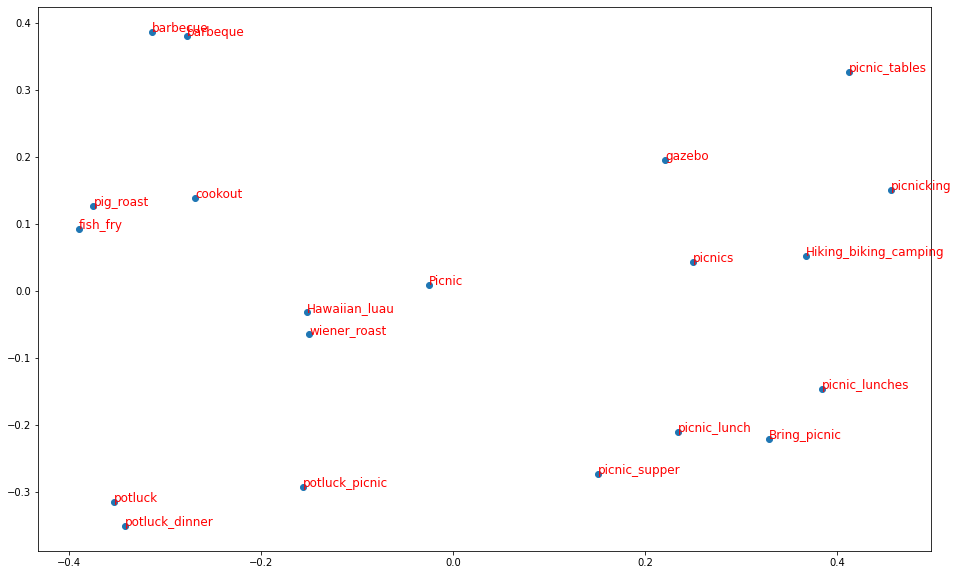

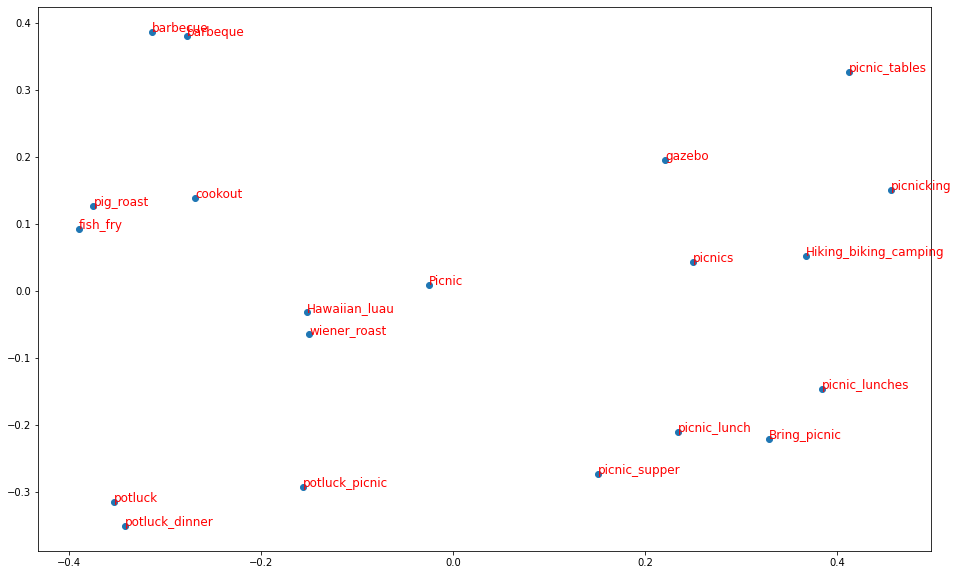

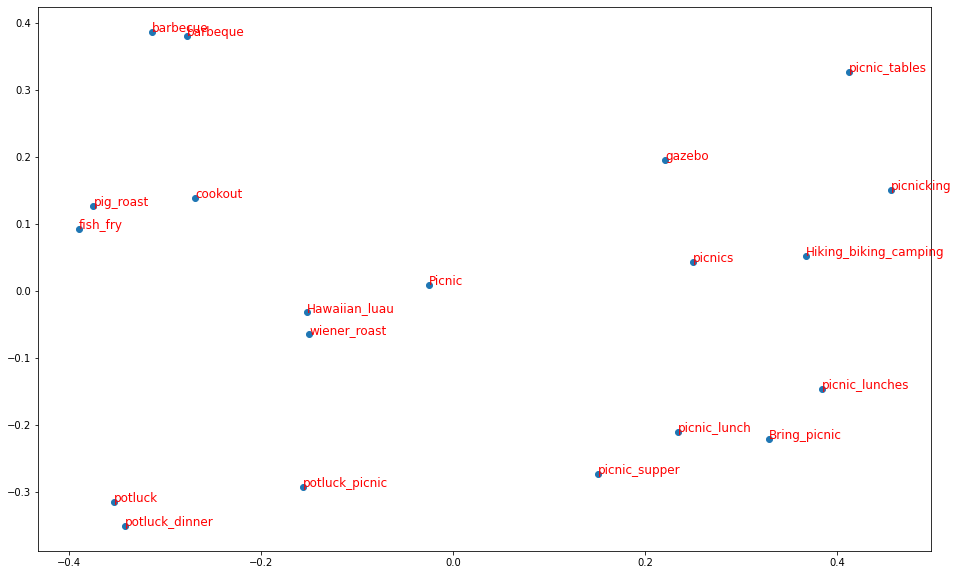

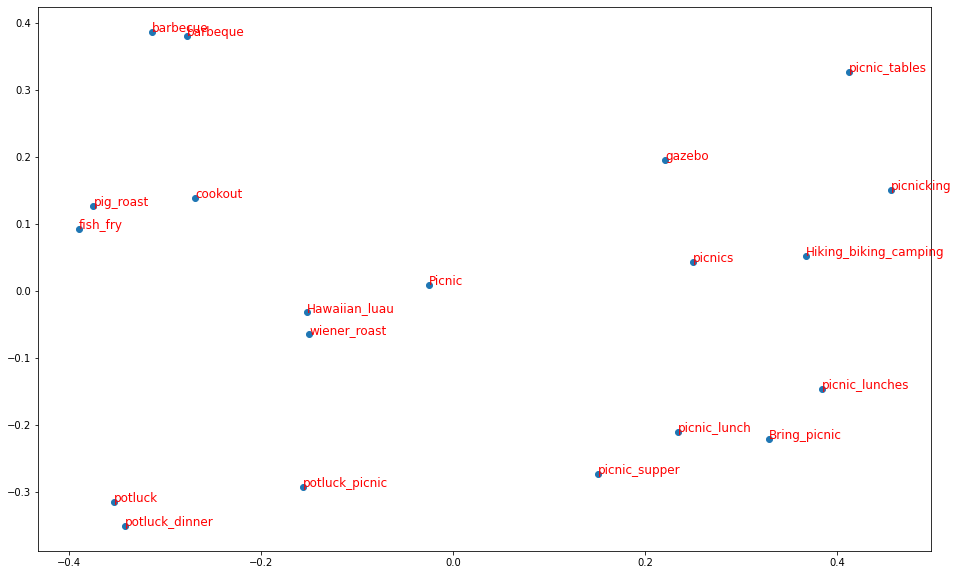

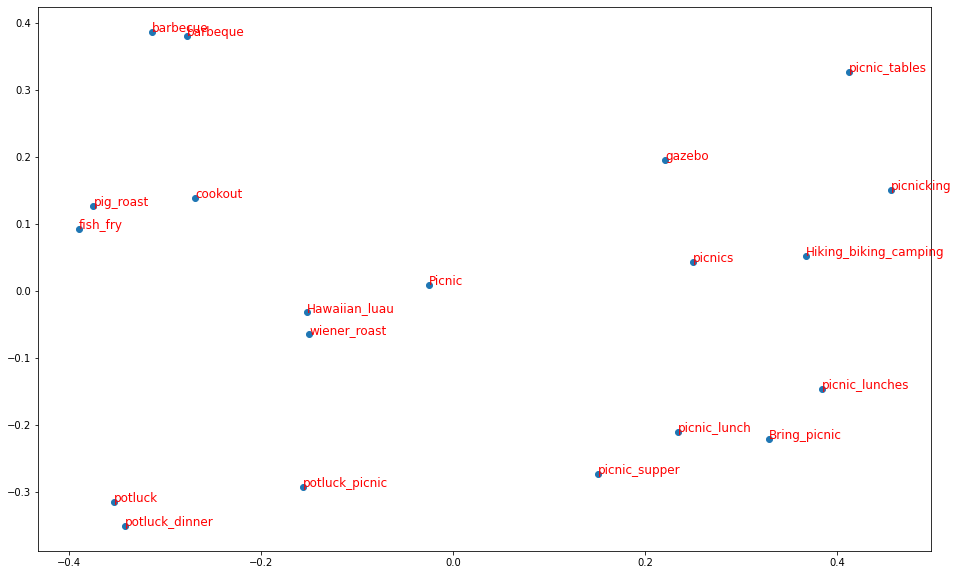

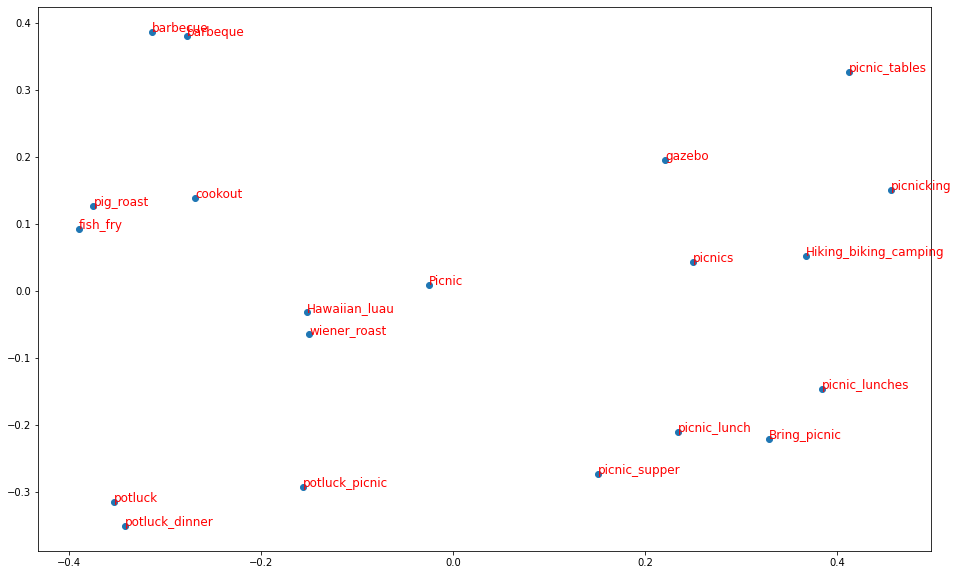

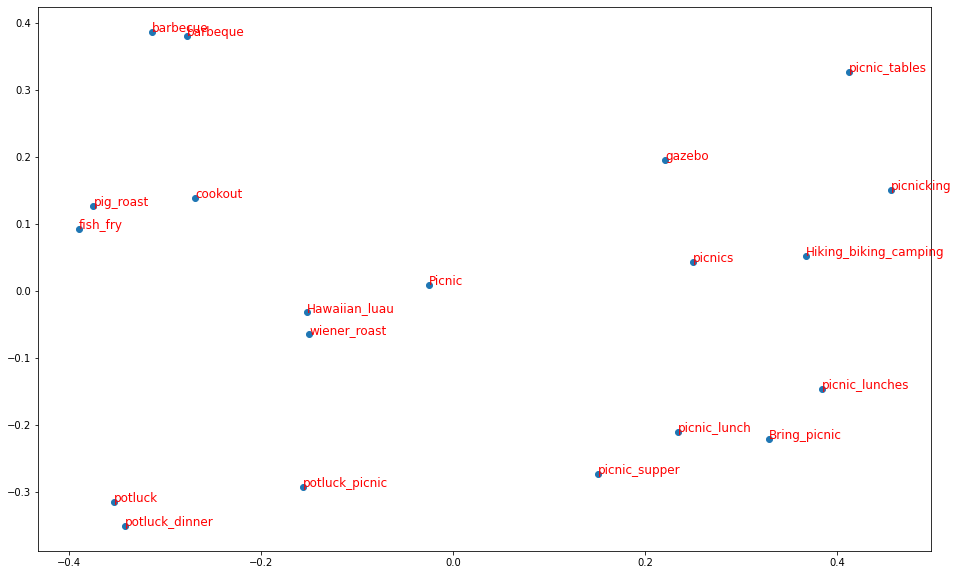

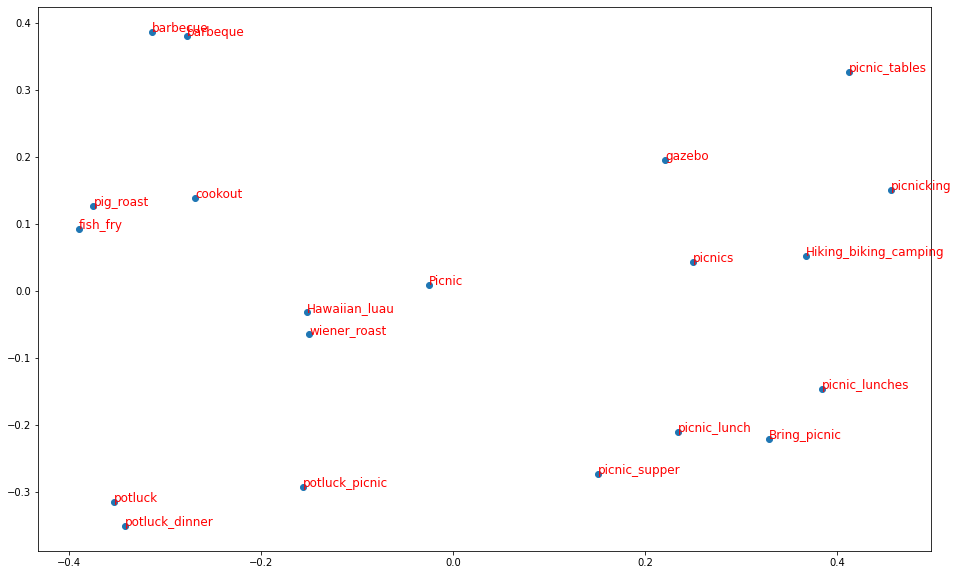

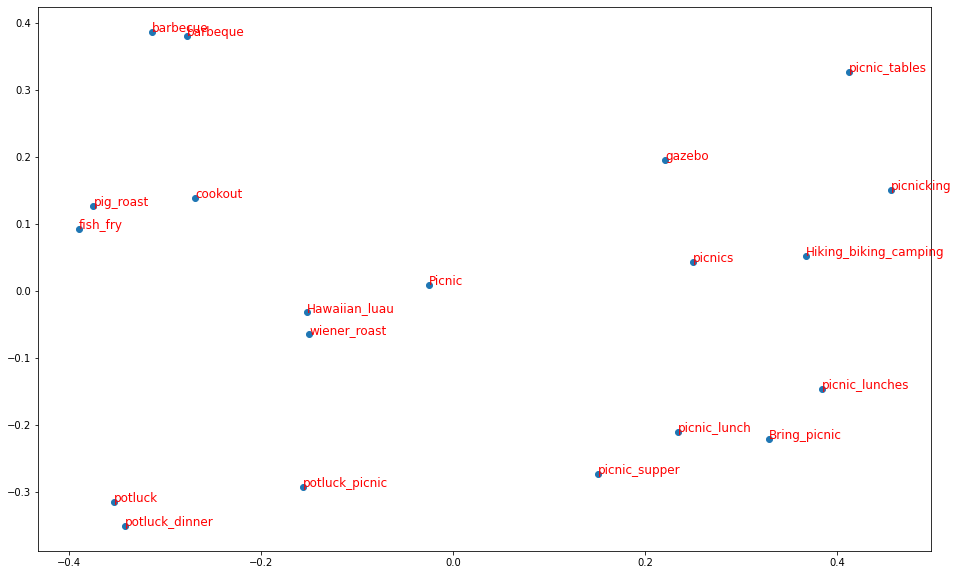

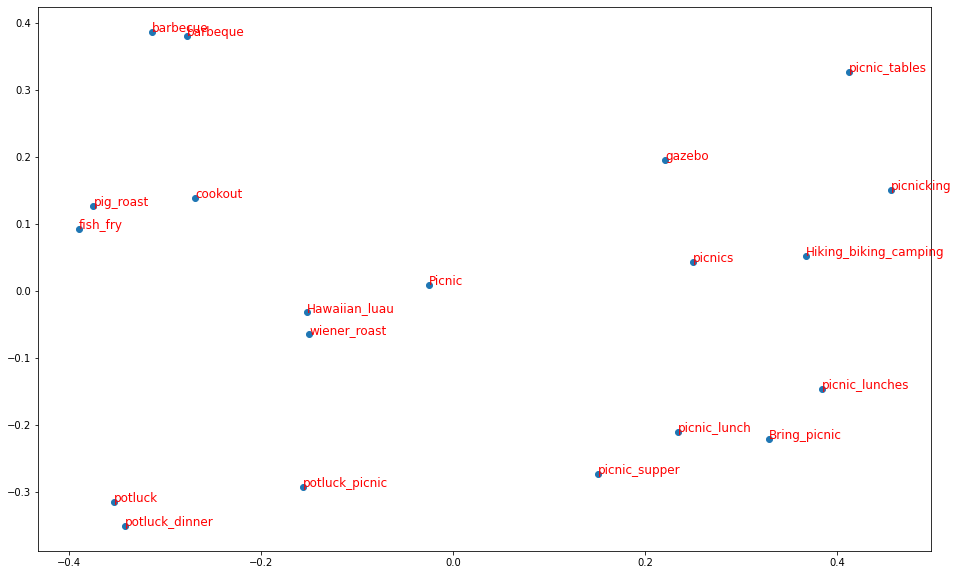

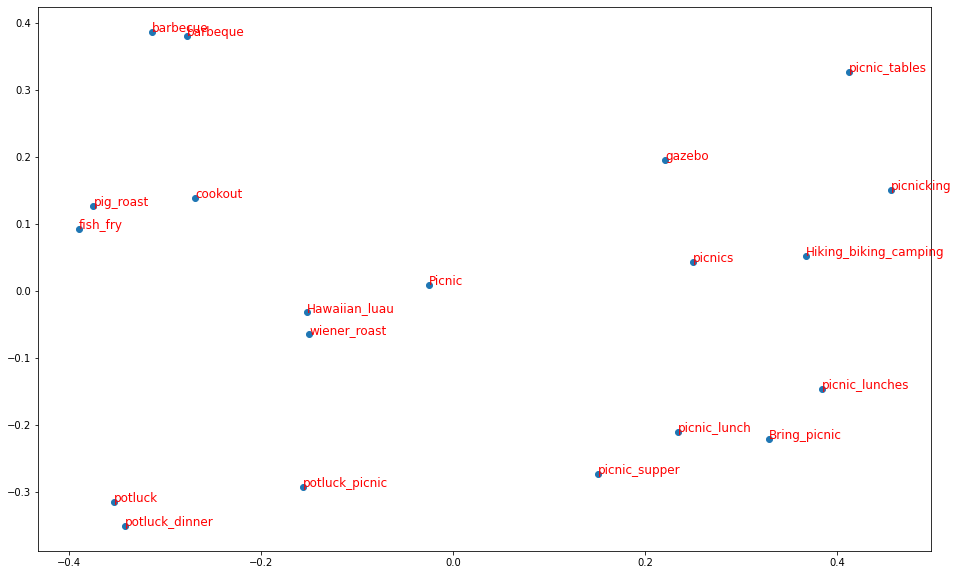

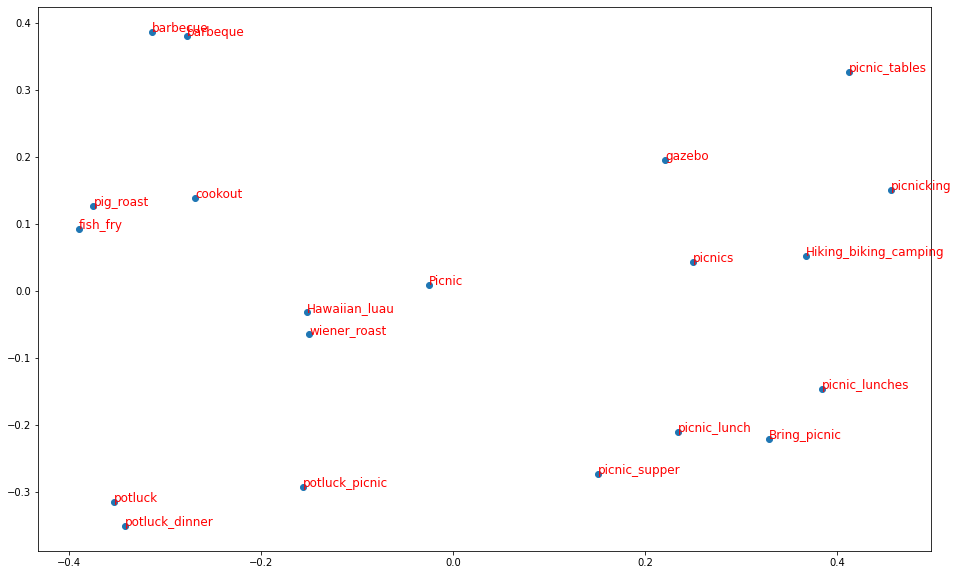

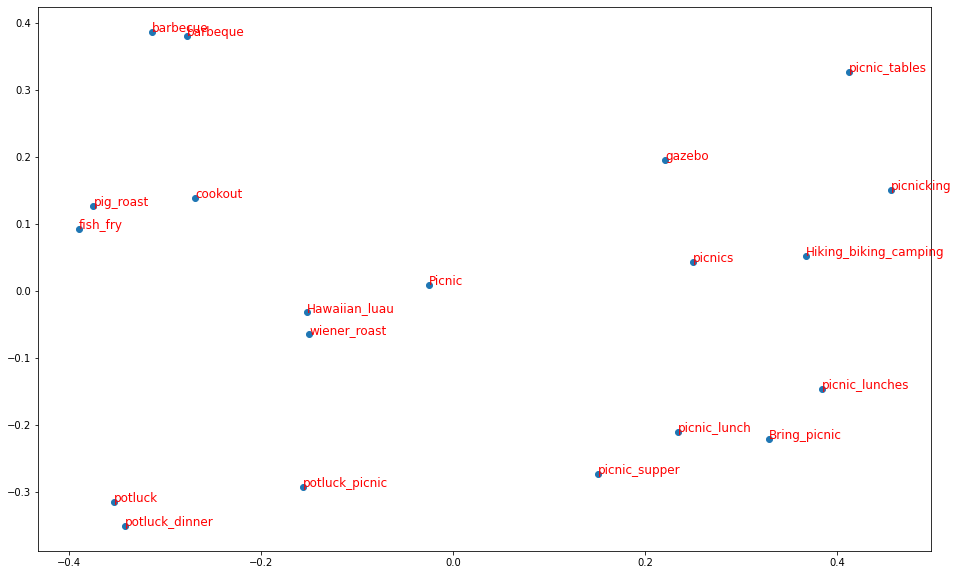

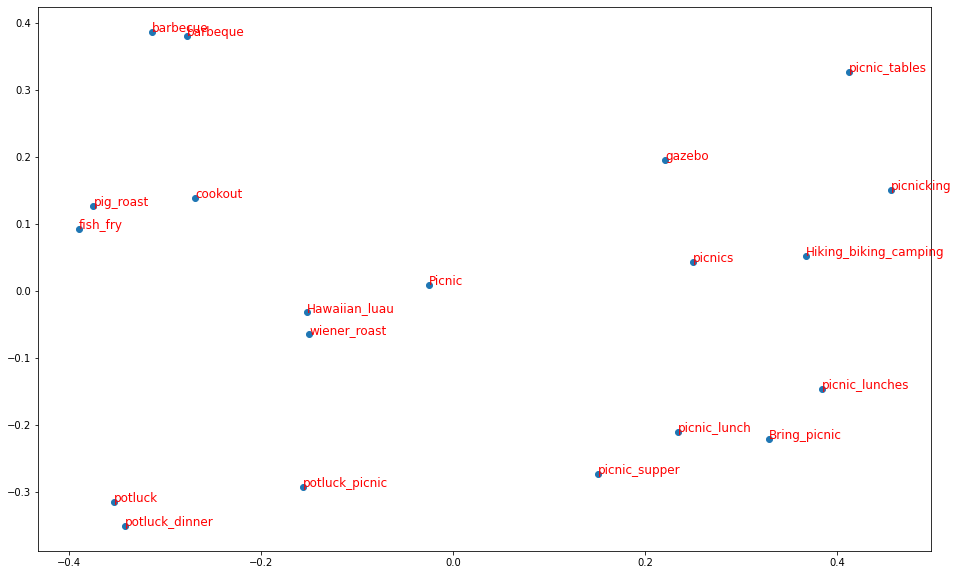

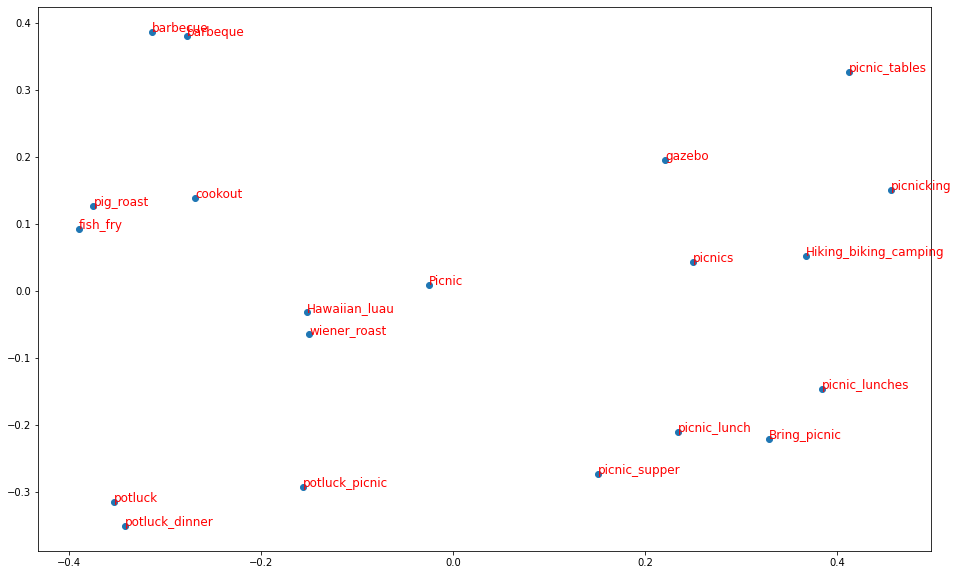

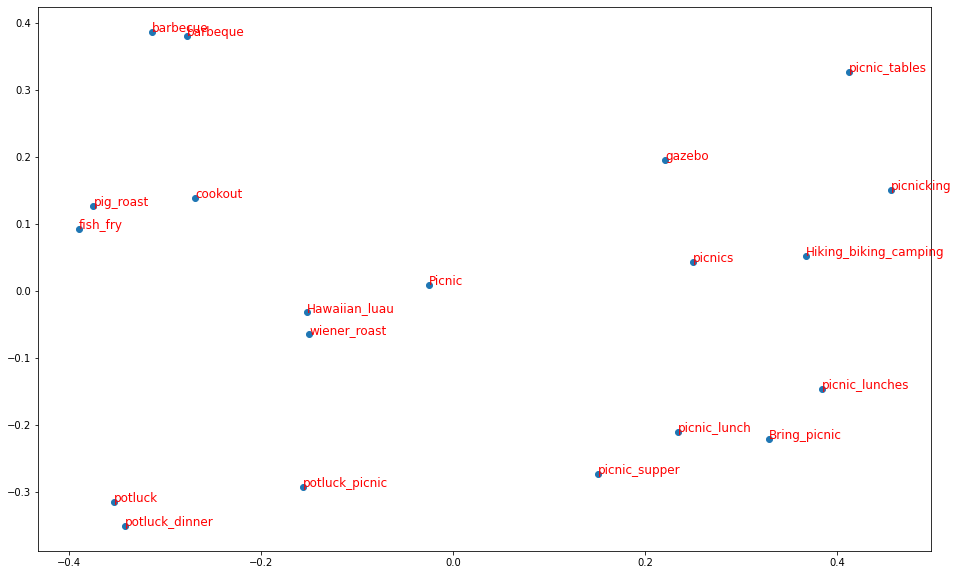

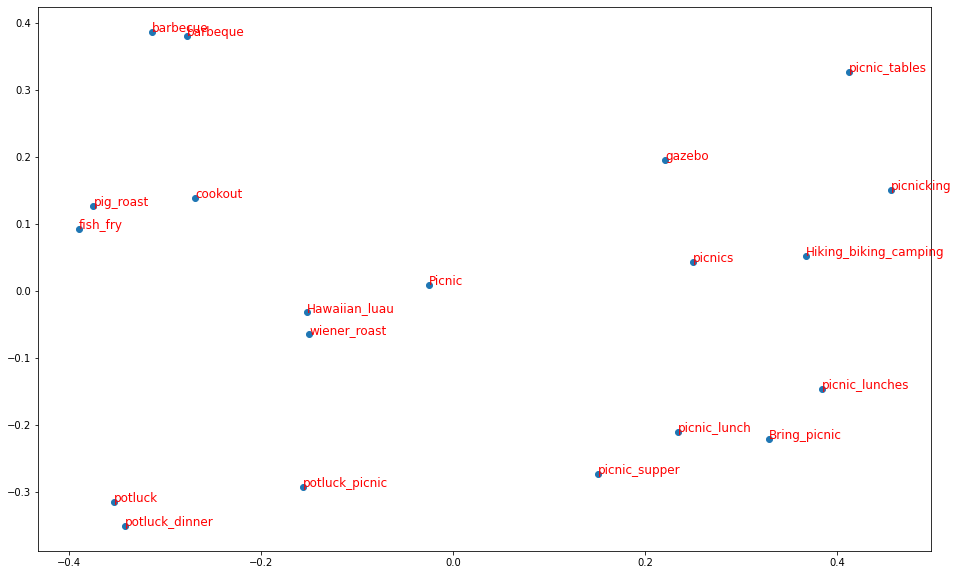

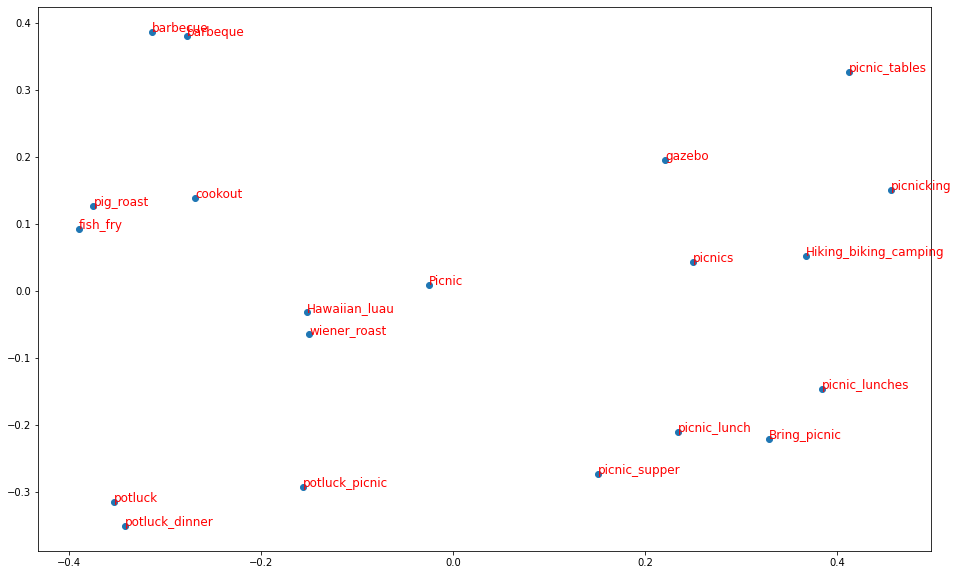

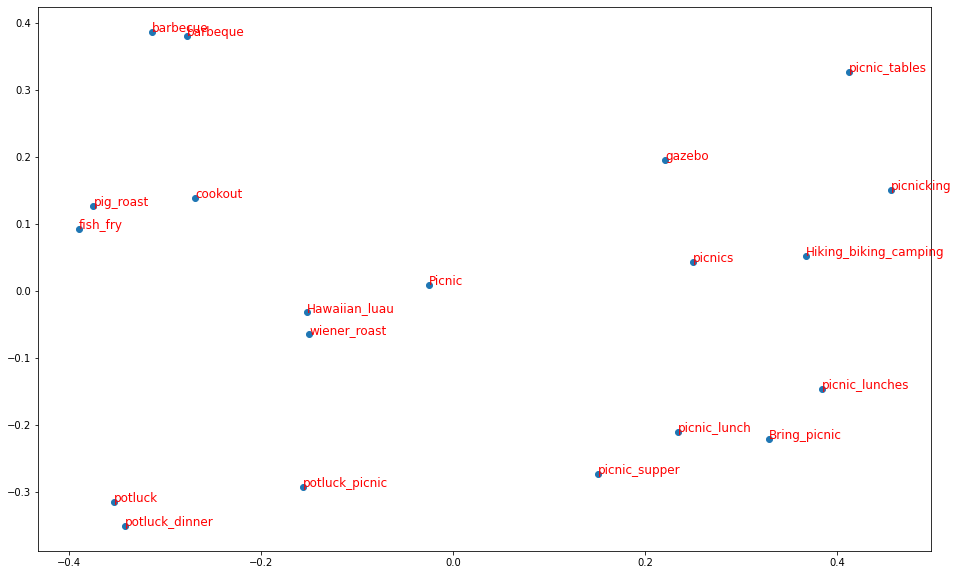

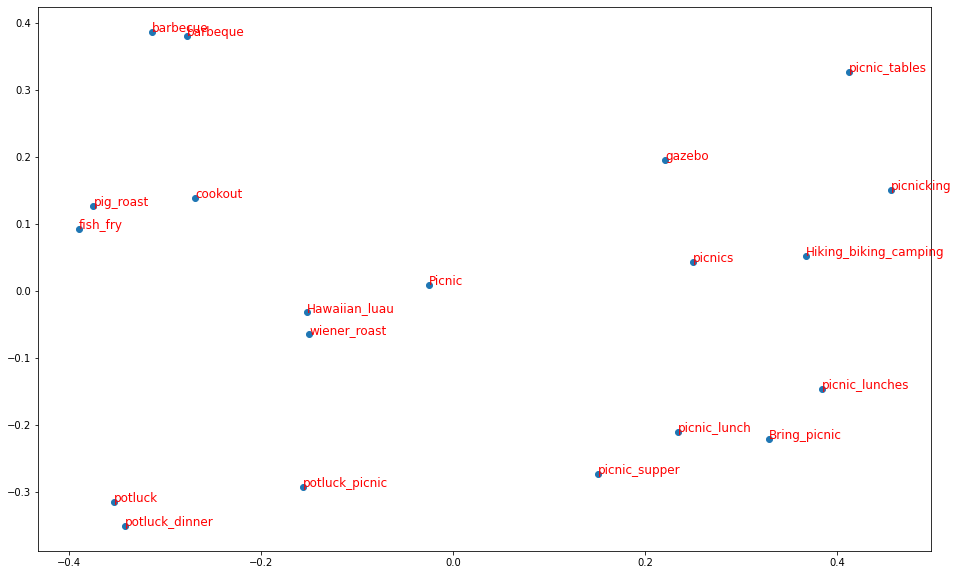

In [109]:
def visualization(word_list):
    pca = PCA(n_components = 2)
    df = pd.DataFrame()
    w_list = []
    i = 1
    for word in word_list:
      pca = PCA(n_components = 2)
      i = 1
      for word in word_list:
          vect = vectors.query(word)
          if i <= 1:
              w_list = vectors.query(word)
              i = i+1
          else:
              w_list = np.vstack((w_list,vect))
      result = pca.fit_transform(w_list)
      x = result[:,0]
      y = result[:,1]
      plt.figure(figsize=(16,10))
      ax = plt.subplot(1,1,1)
      for j in range(len(word_list)):
          ax.text(x[j],y[j],word_list[j],fontsize=12,color='r')
      ax.scatter(x,y)
      plt.savefig('top20.eps')

list_of_kv=vectors.most_similar("picnic", topn = 20)
word_list = [tup[0] for tup in list_of_kv]
print(word_list)
# word_list = ['picnic','picnics','picnic_lunch','Picnic','potluck_picnic','picnic_supper']
visualization(word_list)

In [90]:
a_vector = vectors.query('cat')
pca = PCA(n_components=3)
pca_result = pca.fit_transform(a_vector)
print(pca_result)

ValueError: ignored

# 1).What is the dimensionality of these word embeddings? Provide an integer answer.

In [57]:
print('dim of a vector: {}'.format(vectors.dim)) #300
print('length of a vector: {}'.format(len(vectors))) #3000000

dim of a vector: 300
length of a vector: 3000000


In [89]:
print('type of values returned from vectors.query():{}'.format(type(vectors.query('cat'))))
print('\nlength of the vector returned: {}\n'.format(len(vectors.query("cat"))))
print(vectors.query("cat"))

type of values returned from vectors.query():<class 'numpy.ndarray'>

length of the vector returned: 300

[ 0.0040587  0.0671903 -0.0938735  0.0713696  0.0388996  0.0273262
  0.0163957 -0.0031345  0.0726555 -0.0414715  0.0265225 -0.1928908
 -0.0014668 -0.0977313 -0.00432   -0.0274869  0.0166368  0.0498301
 -0.1478829 -0.0044606  0.0707266 -0.0485442  0.0739415 -0.04115
 -0.0319877  0.0819786 -0.0951595  0.1202353  0.1356665 -0.0282906
 -0.0258795 -0.0649399 -0.0298981 -0.0466153 -0.0337559  0.0430789
 -0.0011403  0.0237899  0.0145472  0.1138056  0.0245936 -0.0369707
  0.0221824  0.0369707  0.0065101 -0.0406678  0.0691192 -0.0237899
 -0.0091623  0.0182443 -0.1099478  0.0281299  0.1131626  0.0459723
  0.016235  -0.0443649  0.0536879 -0.1228071  0.1305228  0.0352026
  0.072977   0.0700837 -0.0295766  0.0681547  0.0294158 -0.0271655
  0.0196106  0.0335951 -0.0633325 -0.0298981  0.1620283  0.0130201
 -0.0233076 -0.000658  -0.0758704  0.084229   0.0295766 -0.0350418
  0.0003466 -0.0193695  0

# 2). What are the top-5 most similar words to picnic (not including picnic itself)?

In [60]:
vectors.most_similar("picnic", topn = 5) #  the top-5 most similar words to picnic. 

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [78]:
vectors.most_similar??

In [76]:
vectors.distance('picnic','picnics')

0.7209888

In [63]:
vectors.most_similar??

In [64]:
vectors.most_similar(vectors.query("picnic"), topn = 6) # the top-5 most similar words by vector

[('picnic', 0.9999998),
 ('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [75]:
vectors.most_similar_cosmul??

In [74]:
vectors.closer_than("picnic", "picnics") #

[]

# 3).According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']

In [68]:
vectors.doesnt_match(['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']) # tissue

'tissue'

In [101]:
vectors.most_similar_to_given("cat", ["dog", "television", "laptop", "rabbit"])

'dog'

In [103]:
vectors.doesnt_match?

# 4).Solve the following analogy: leg is to jump as X is to throw.


## notes: 
### (1).For 𝑘𝑖𝑛𝑔−𝑚𝑎𝑛+𝑤𝑜𝑚𝑎𝑛=𝑞𝑢𝑒𝑒𝑛 they claimed that the closest word vector to 𝑘𝑖𝑛𝑔−𝑚𝑎𝑛+𝑤𝑜𝑚𝑎𝑛 is 𝑞𝑢𝑒𝑒𝑛;
### (2).Woman and king is positive



In [22]:
vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"]) # forearm

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

In [69]:
vectors.most_similar_cosmul(positive = ["leg", "throw"], negative = ["jump"]) # forearm

[('forearm', 0.876599),
 ('metacarpal_bone', 0.8747273),
 ('elbow', 0.86924946),
 ('metacarpal_bones', 0.86801016),
 ('knuckle', 0.8675384),
 ('shoulder', 0.86726993),
 ('shin', 0.86424685),
 ('nonthrowing_shoulder', 0.86377436),
 ('dislocating_finger', 0.857464),
 ('pinkie', 0.851935)]

In [73]:
# The one I am using does not support 'most_similar_approx'
# vectors.most_similar_approx(positive = ["woman", "king"], negative = ["man"])


ImportError: ignored